# Boder AVQ and DRQ

### Import Packages and Data

In [1]:
import pandas as pd
import numpy as np
import re 

In [2]:
# DRQ
Braun=pd.read_csv("Braun.csv")
Freich=pd.read_csv("Freich.csv")
Kharchenko=pd.read_csv("Kharchenko.csv")
Kovitzka=pd.read_csv("Kovitzka.csv")
Matzner=pd.read_csv("Matzner.csv")
Odinetz=pd.read_csv("Odinetz.csv")

In [3]:
# there are Boder's DRQ data for Braun, Kharchenko, and Odinetz
Braun_DRQ_list = [0,0,87,82,100,100,48,100,0,43,100,100,67,100,0,100,0,33,57,83,80,100,62,25,0,67,100,88,88,100,0,89,100,33,0,50,33]
Kharchenko_DRQ_list = [80,33,66,100,100,100,0,100,0,100,92,70,100,80,0,25,50,100,100,100]
Odinetz_DRQ_list = [0,100,0,0,0,78,100,100,80,0,75,75,80,20,80,100,75,28,78,57,0,100]

In [40]:
# AVQ
Braun_avq=pd.read_csv("12_Anna_Braun_avq_page.txt", sep="\t", header=None)
Freich_avq=pd.read_csv("28_Fania_Freilich_avq_page.txt", sep="\t", header=None)
Kharchenko_avq=pd.read_csv("55_Ioan_Kharchenko_avq_page.txt", sep="\t", header=None)
Kovitzka_avq=pd.read_csv("52_Anna_Kaletska_avq_page.txt", sep="\t", header=None)
Matzner_avq=pd.read_csv("67_Jaques_Matzner_avq_page.txt", sep="\t", header=None)
# Odinetz_avq=pd.read_txt("Odinetz.csv") no data from Anna

In [34]:
# there are Boder's AVQ data also
Braun_AVQ_list = [50,54,0,0,18,0,20,9,11,11,0,25,8,20,50,71,33,11,8,7,4,4,0,22,27,12,9,31,11,7,7,0,5,0,1,0,0]
Kharchenko_AVQ_list = [56,22,7,14,37,10,100,12,40,25,9,20,42,31,20,40,10,35,15,11]
Odinetz_AVQ_list = [75,18,76,56,16,27,38,44,54,100,18,41,38,33,61,28,33,55,29,50,89,127]

### Redo the Boder Plots
We redo the three graphs, where both the Boder hand-calculated data and the web scrapped data are avaliable.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

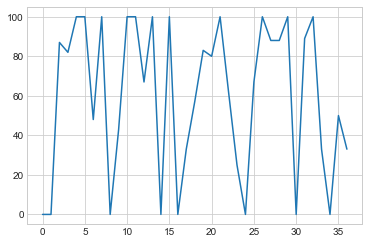

In [5]:
# Braun
fig1 = plt.figure()
ax1 = plt.axes()
ax1.plot(Braun_DRQ_list)

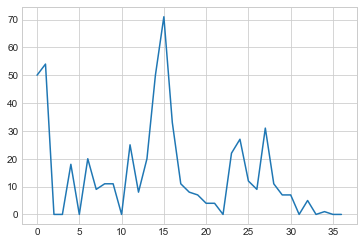

In [42]:
avq1 = plt.figure()
ax1 = plt.axes()
ax1.plot(Braun_AVQ_list)

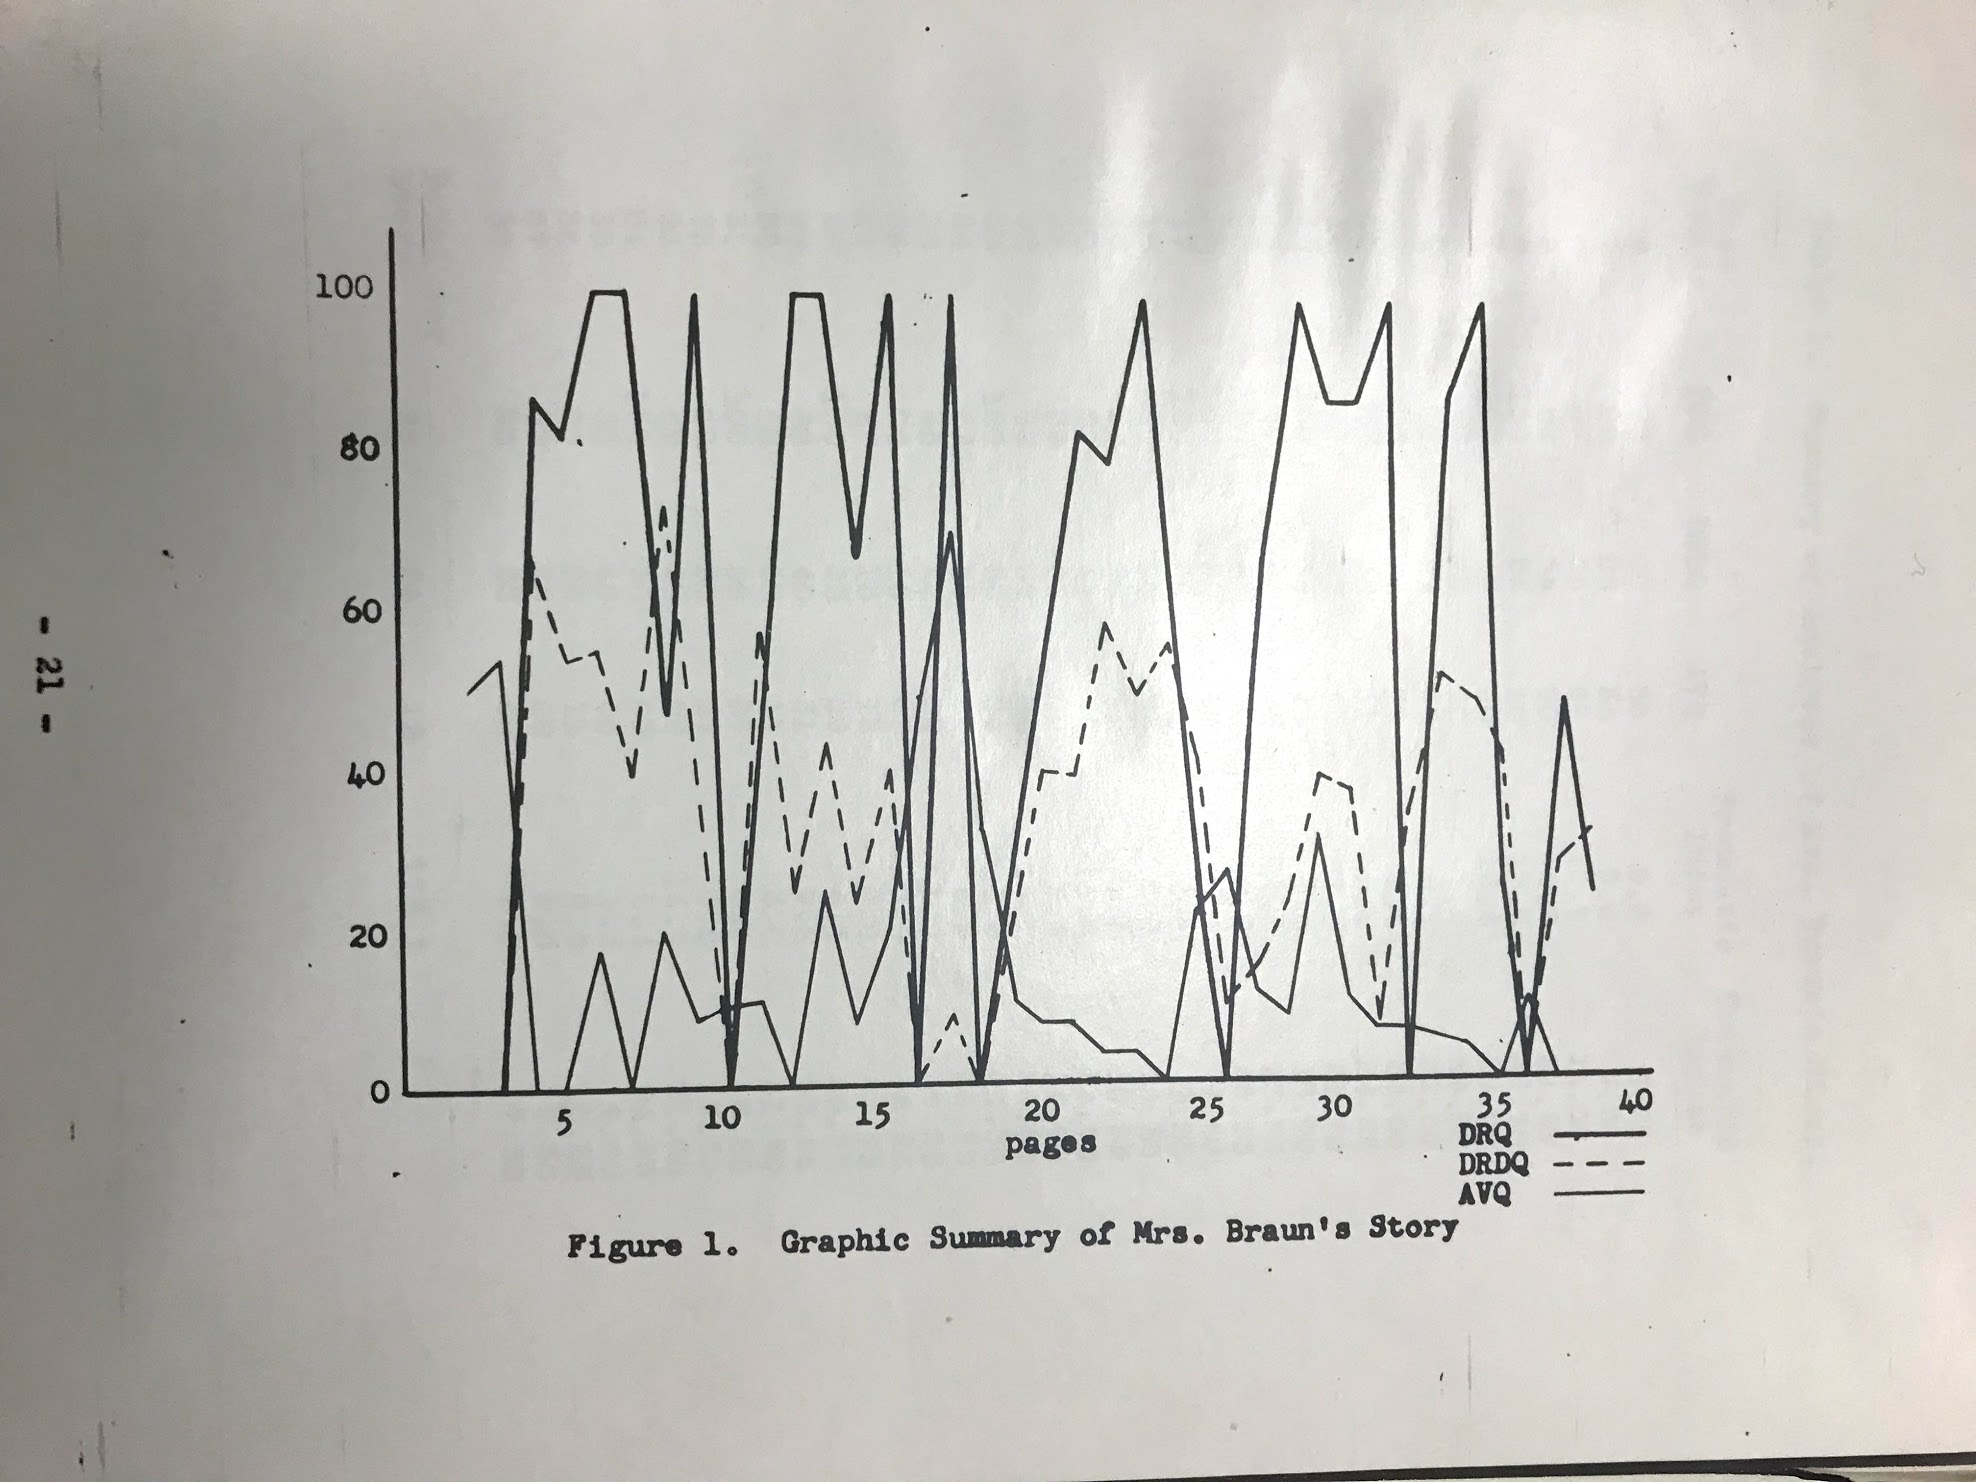

In [6]:
from IPython.display import Image
Image(filename='Braun_graph.jpg',width=600)

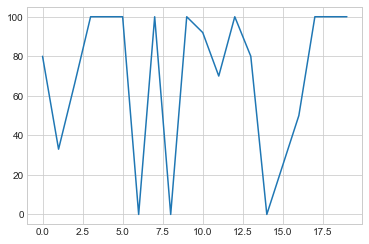

In [7]:
# Kharchenko
fig2 = plt.figure()
ax2 = plt.axes()
ax2.plot(Kharchenko_DRQ_list) # we don't worry about the x-axis for now

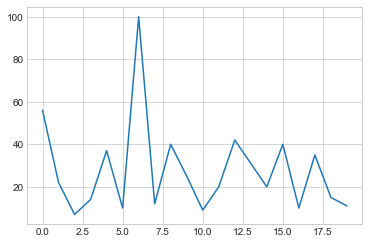

In [43]:
avq2 = plt.figure()
ax2 = plt.axes()
ax2.plot(Kharchenko_AVQ_list)

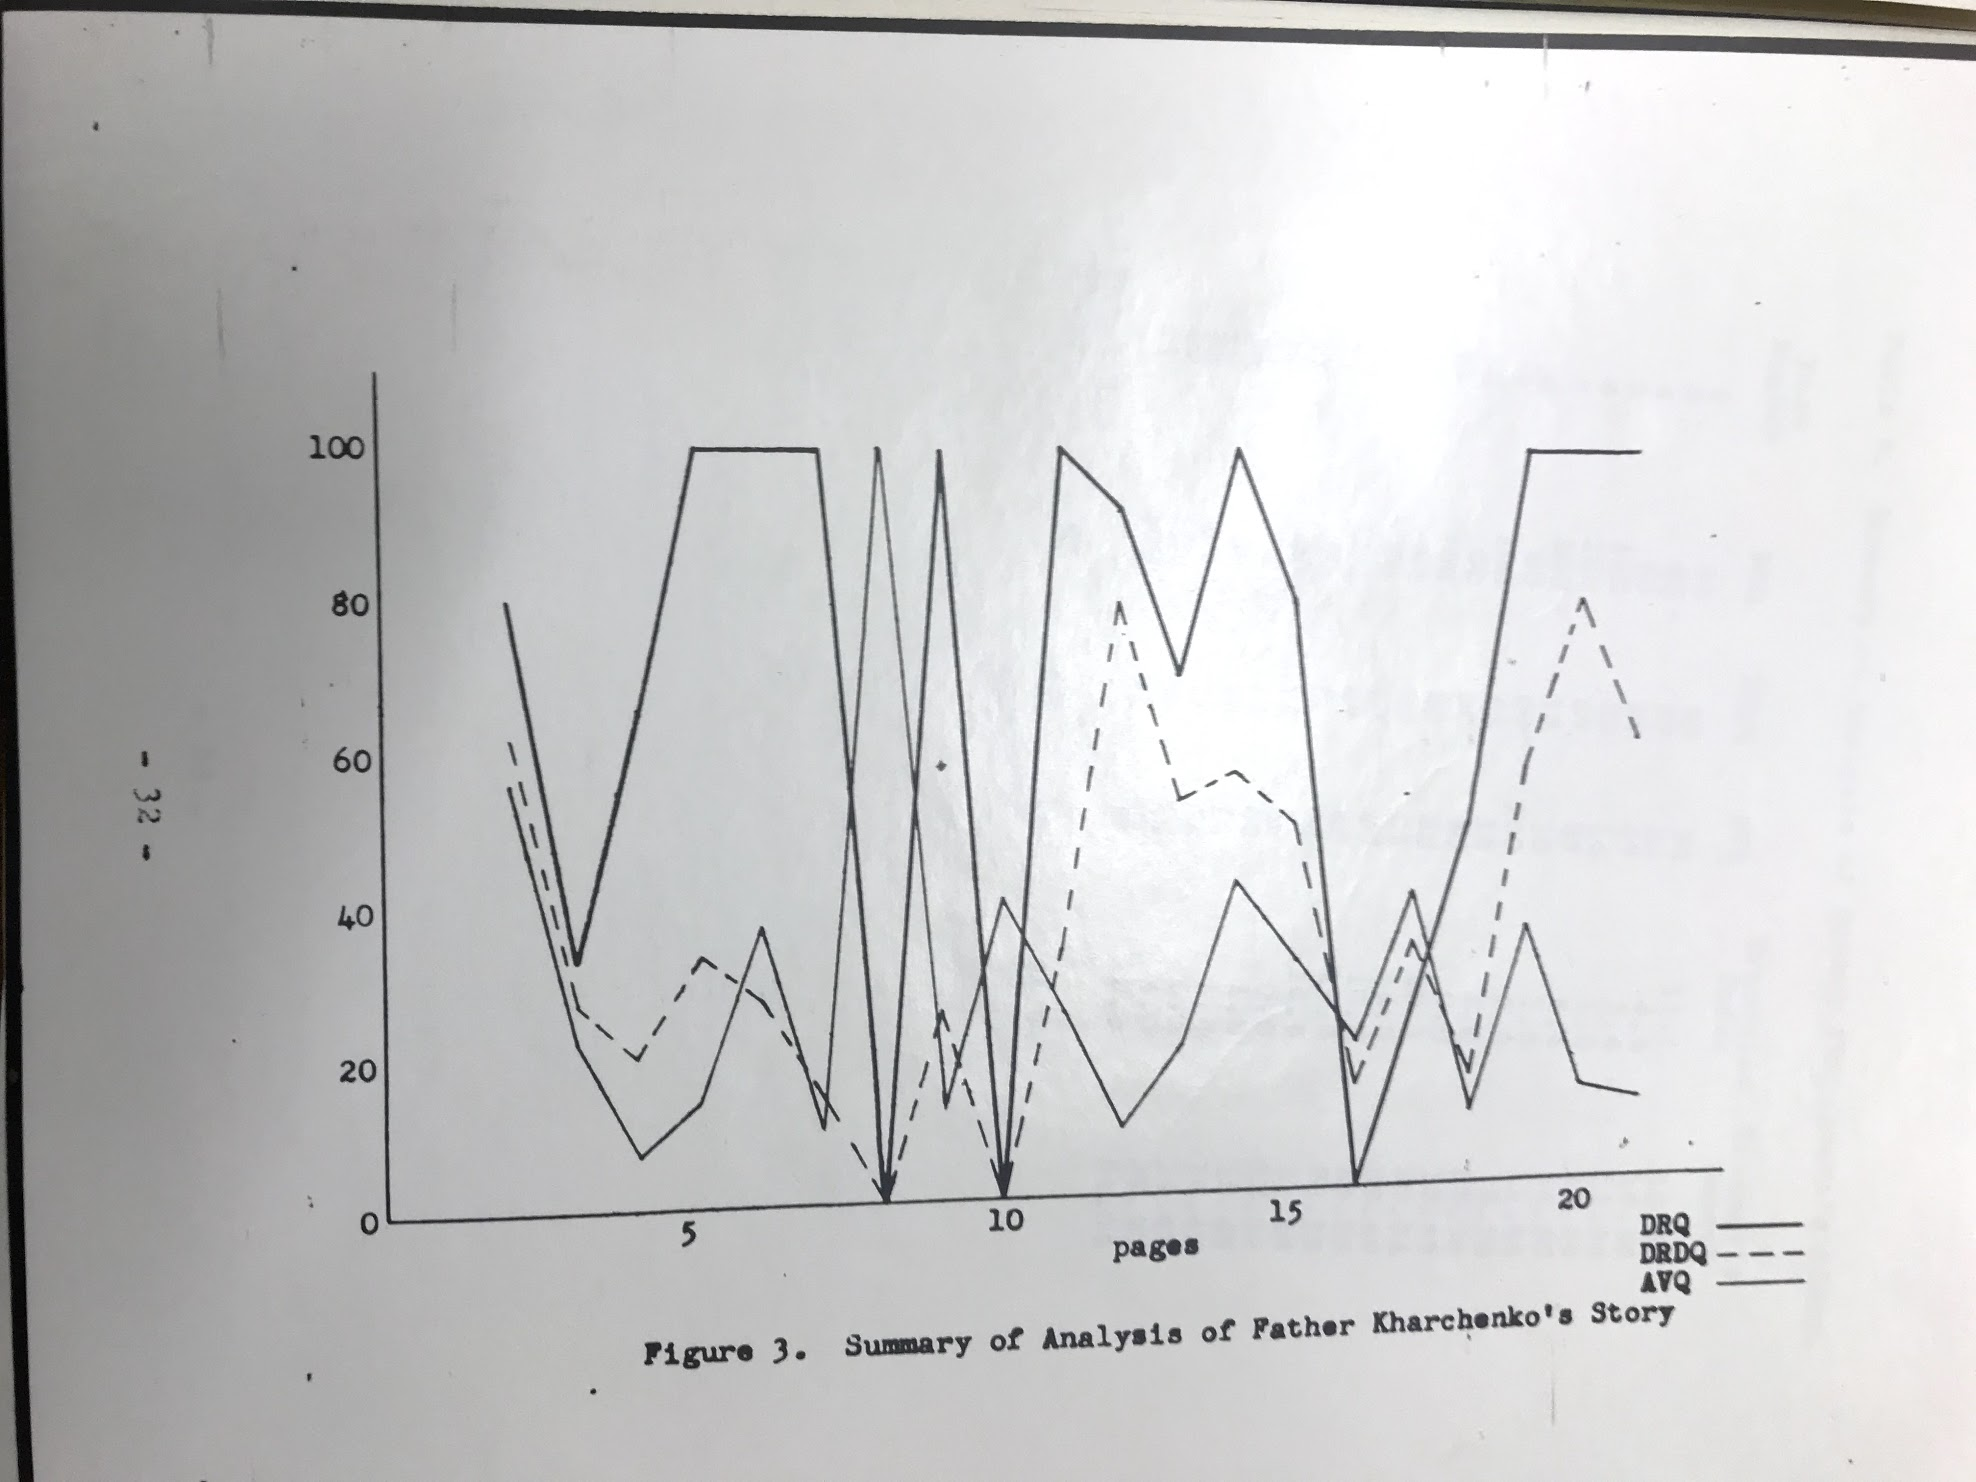

In [8]:
Image(filename='Kharchenko_graph.jpg',width=600)

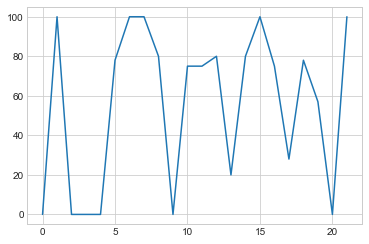

In [9]:
# Odinetz
fig3 = plt.figure()
ax3 = plt.axes()
ax3.plot(Odinetz_DRQ_list)

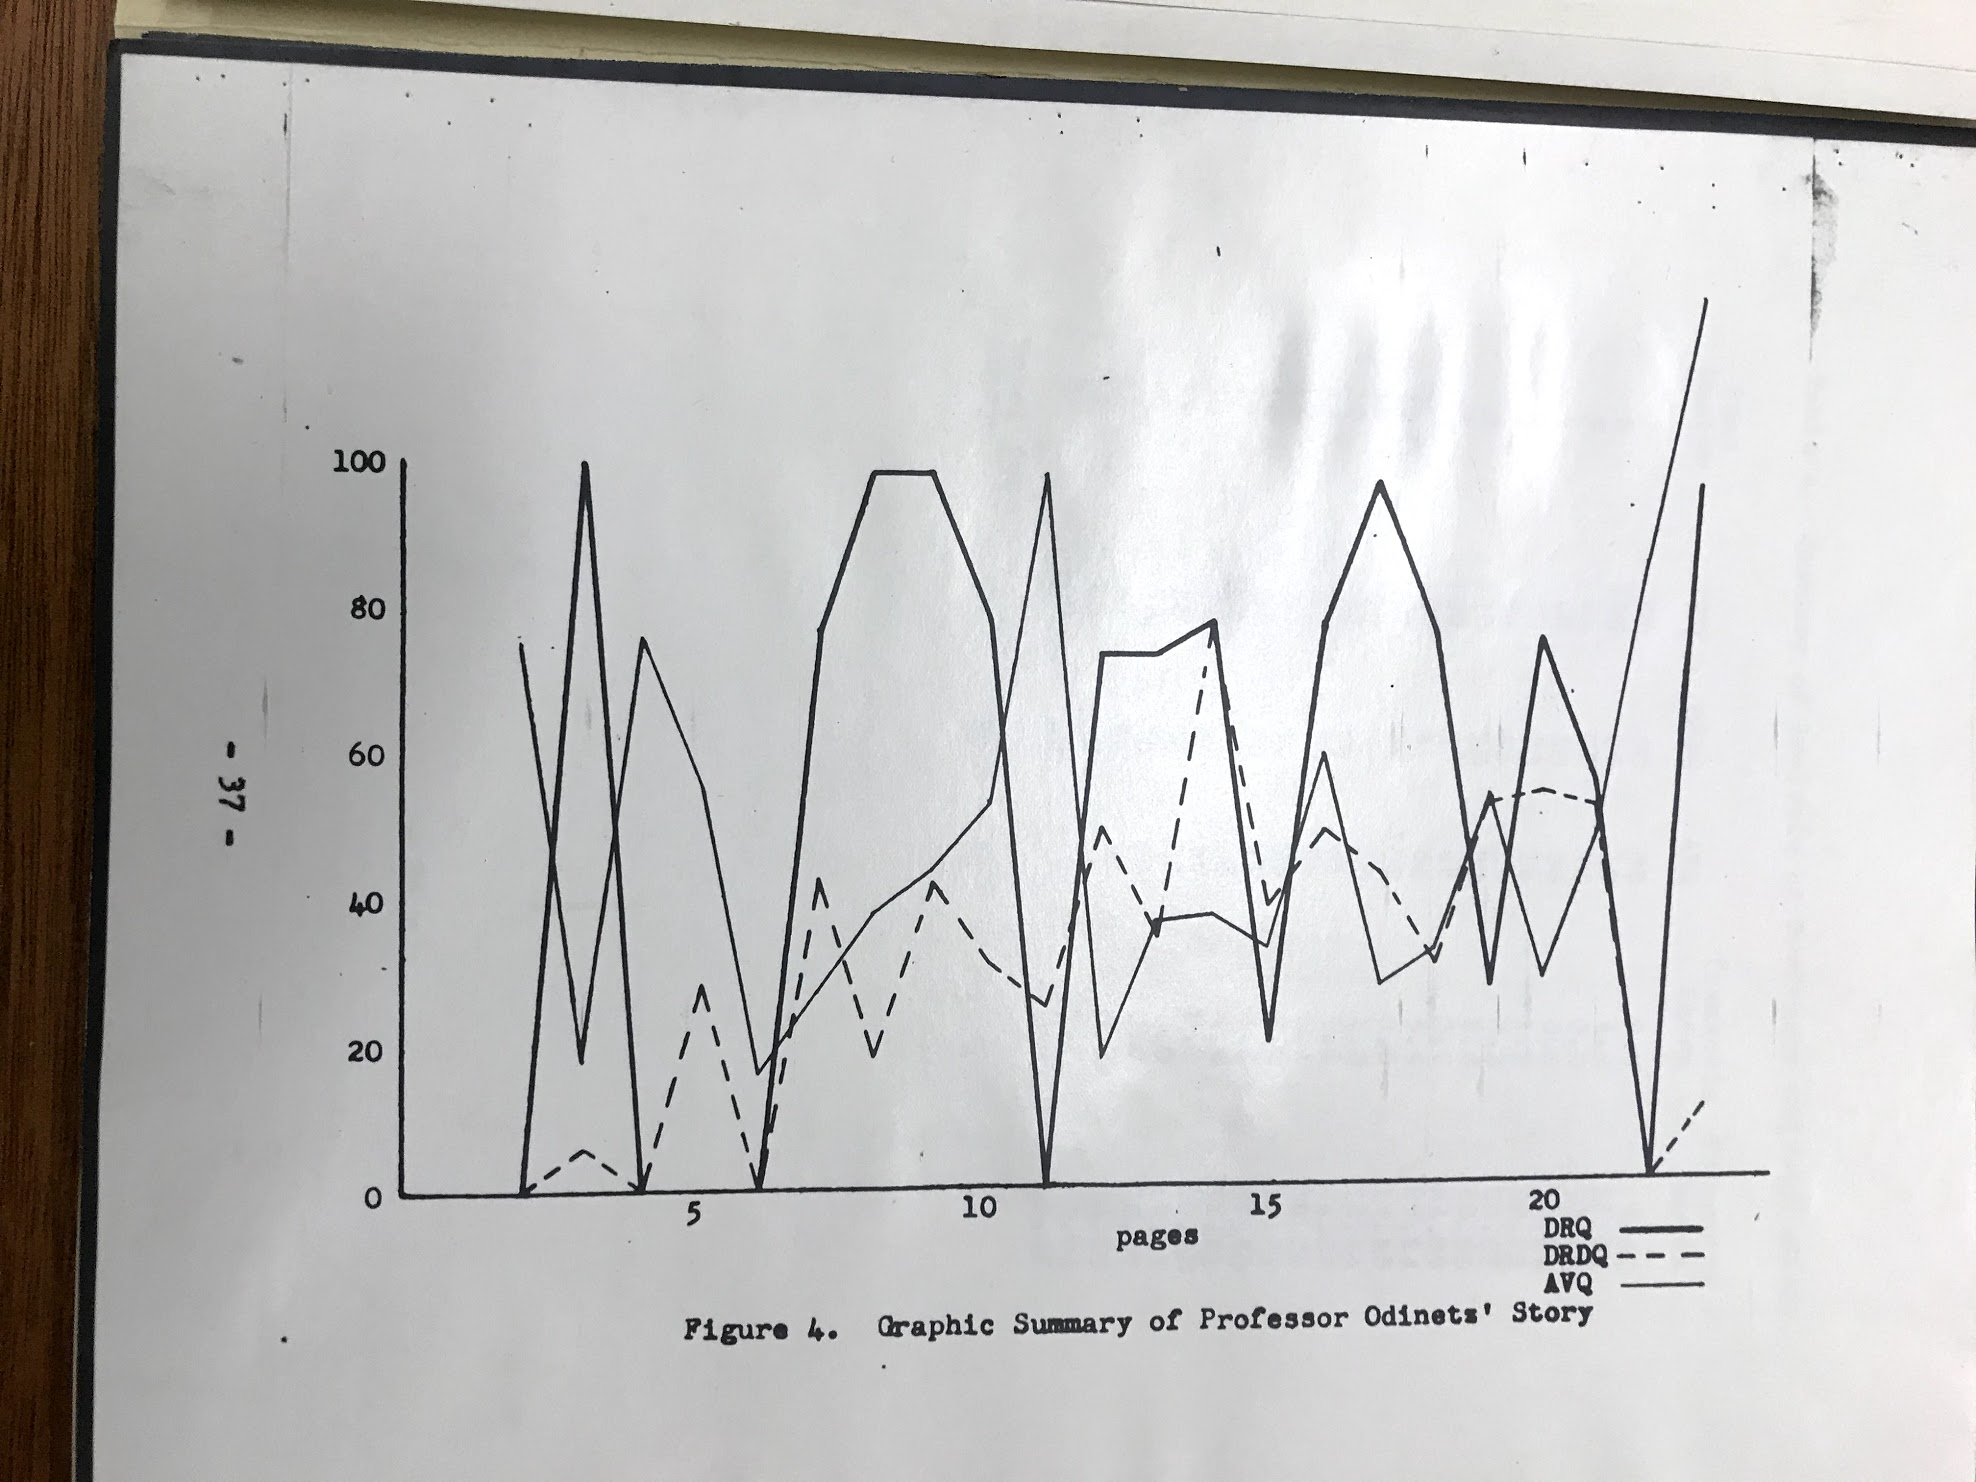

In [10]:
Image(filename='Odinetz_graph.jpg',width=600)

### DRQ: Try Sentiment Analysis Methods

- Exclue Boder lines
- Merge each page, regardless of segment across linebreaks
- Keep words, page_num, chapter and id_new.
- Get rid of words inside of [ ]

In [11]:
# wangle the data to dfs with unit of page

def to_page(df,interviewer): # interviewer is a str, here "David Boder"
    
    # as one df has only one interview
    current_chapter = df.chapter[0]
    current_id_new = df.id_new[0]
    
    # exclude interviewer's lines
    df = df[df.speaker!=interviewer].reset_index(drop=True) 
    
    # set empty values as starts
    current_page_num = 0 
    words_combined = ""
    pages = [] # pages is an empty list of lists of 'words', 'page_num', 'chapter', and 'id_new'
    
    # loop over the interviewee only df
    for i in range(len(df)):
        # start of a page
        if df.page_num[i]>current_page_num:
            current_page_num = df.page_num[i]
        
        # comine words
        if current_page_num == df.page_num[i]:
            # get rid of the notes inside of []
            words1 = df.words[i]
            words1 = re.sub("[\[].*?[\]]", "", words1)
            # append
            words_combined = words_combined+" "+words1
        
        # append if this is the end of a page
        if i==len(df)-1 or df.page_num[i+1]!=df.page_num[i]:
            pages.append([words_combined, current_page_num, int(current_chapter), int(current_id_new)])
            words_combined = "" # get back to default
    
    # create a df and return
    df2 = pd.DataFrame(pages, columns=['words', 'page_num', 'chapter', 'id_new'])
    return df2

In [12]:
# wangle the data to dfs with sentiment scores
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def analyze_sentiment(df):
    
    # pages is an empty list of lists of sentiment scores
    sentiments = []
    
    # analyzer calculate sentiment scores for texts
    analyzer = SentimentIntensityAnalyzer()
    
    # loop over the wangled df to give scores
    for i in range(df.shape[0]):
        line = df['words'].iloc[i]
        sentiment = analyzer.polarity_scores(line)
        sentiments.append([sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound']])
    
    # create a df and return
    df3 = pd.DataFrame(sentiments,columns=['neg', 'pos', 'neu', 'compound'])
    return df3

/Users/lizhoufan/anaconda3/lib/python3.6/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.24.3) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [13]:
# try sentiment analysis methods on each of the pages (wrangled dfs)
interviewer = "David Boder"
Braun_page_senti = analyze_sentiment(to_page(Braun, interviewer))
Kharchenko_page_senti = analyze_sentiment(to_page(Kharchenko, interviewer))
Odinetz_page_senti = analyze_sentiment(to_page(Odinetz, interviewer))

In [14]:
Braun_page_senti.head()

,neg,pos,neu,compound
0,0.058,0.106,0.837,0.5719
1,0.029,0.132,0.839,0.9022
2,0.063,0.081,0.855,0.3291
3,0.159,0.067,0.775,-0.8993
4,0.098,0.084,0.818,-0.3400


In [15]:
len(Braun_page_senti)

38

In [16]:
len(Braun_DRQ_list)

37

I doubled checked the original PDF. Boder did not include the page 39 (729), but we still visualize it.

In [17]:
Kharchenko_page_senti.head()

,neg,pos,neu,compound
0,0.074,0.098,0.829,0.4083
1,0.043,0.138,0.819,0.8586
2,0.028,0.059,0.913,0.3722
3,0.061,0.145,0.794,0.6486
4,0.086,0.022,0.892,-0.8872


In [18]:
len(Kharchenko_page_senti)

20

In [19]:
len(Kharchenko_DRQ_list)

20

In [20]:
Odinetz_page_senti.head()

,neg,pos,neu,compound
0,0.010,0.088,0.902,0.9382
1,0.019,0.044,0.937,0.8201
2,0.017,0.101,0.882,0.9558
3,0.034,0.118,0.848,0.9184
4,0.111,0.122,0.767,0.4802


In [21]:
len(Odinetz_page_senti)

22

In [22]:
len(Odinetz_DRQ_list)

22

In [23]:
# visualize the sentiment contast
# try several different ways
# method 1: neg/pos
Braun_page_senti["neg_over_pos"] = Braun_page_senti.neg/Braun_page_senti.pos

$$\frac{negative}{positive}$$

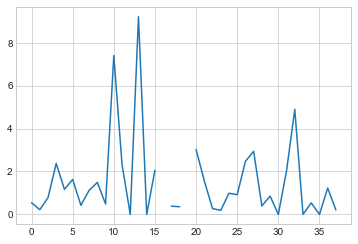

In [24]:
Braun_page_senti.neg_over_pos.plot()

In [25]:
# method 2: neg/pos+neg
Braun_page_senti["neg_over_all"] = Braun_page_senti.neg/(Braun_page_senti.neg+Braun_page_senti.pos)*100

$$\frac{negative}{positive+negative}$$

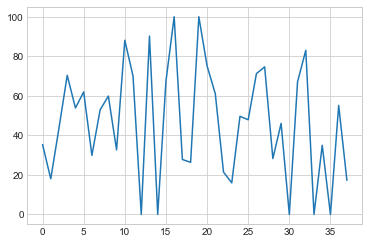

In [26]:
Braun_page_senti.neg_over_all.plot()

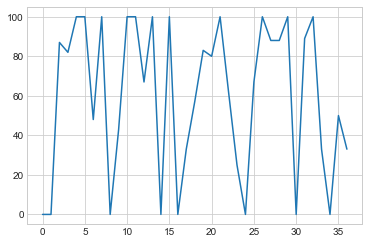

In [27]:
# compare: (genrated from Boder's visualization!)
# Braun
fig1 = plt.figure()
ax1 = plt.axes()
ax1.plot(Braun_DRQ_list) # similar to method 2

### The result looks very exciting! They are basically in the same shape with several vatiation, and the variation for the current method is smaller than Boder's variation. This result closely supports our assumption!

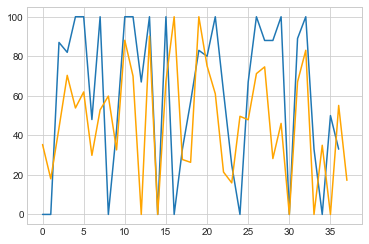

In [28]:
# we put them into the same plot:
fig1_1 = plt.figure()
ax1_1 = plt.axes()
ax1_1.plot(Braun_DRQ_list)
ax1_1.plot(Braun_page_senti.neg_over_all,color="orange")

In [46]:
Braun_avq.columns=["pages","pos_avq"]

In [51]:
Braun_avq.pos_avq.mean()

131.38641025641024

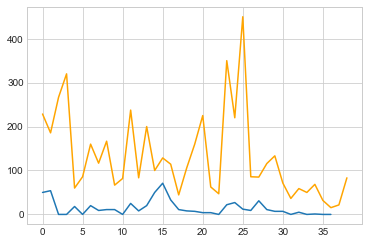

In [57]:
avq1_1 = plt.figure()
ax1_1 = plt.axes()
ax1_1.plot(Braun_AVQ_list)
# un-normalized AVQ
ax1_1.plot(Braun_avq.pos_avq,color="orange")

$$Normalzied \ AVQ = \frac{AVQ_{POS}}{mean(AVQ_{Boder})} \times mean(AVQ_{POS})$$

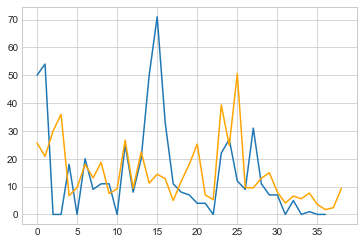

In [56]:
avq1_1 = plt.figure()
ax1_1 = plt.axes()
ax1_1.plot(Braun_AVQ_list)
# normalized AVQ
ax1_1.plot(Braun_avq.pos_avq/Braun_avq.pos_avq.mean()*sum(Braun_AVQ_list)/len(Braun_AVQ_list),color="orange")

### We do extactly same thing to the other two datasets:

In [29]:
Kharchenko_page_senti["neg_over_all"] = Kharchenko_page_senti.neg/(Kharchenko_page_senti.neg+Kharchenko_page_senti.pos)*100
Odinetz_page_senti["neg_over_all"] = Odinetz_page_senti.neg/(Odinetz_page_senti.neg+Odinetz_page_senti.pos)*100

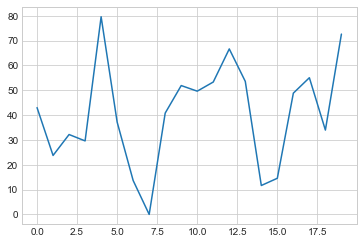

In [30]:
# Kharchenko
Kharchenko_page_senti.neg_over_all.plot()

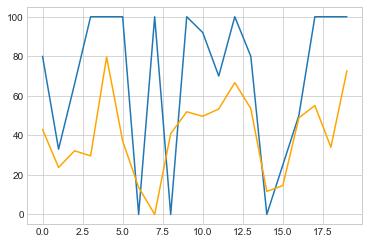

In [31]:
fig2_1 = plt.figure()
ax2_1 = plt.axes()
ax2_1.plot(Kharchenko_DRQ_list)
ax2_1.plot(Kharchenko_page_senti.neg_over_all,color="orange")

In [59]:
Kharchenko_avq.columns=["pages","pos_avq"]

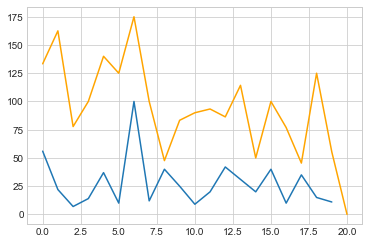

In [61]:
# AVQ un-normalized
avq2_1 = plt.figure()
ax2_1 = plt.axes()
ax2_1.plot(Kharchenko_AVQ_list)
ax2_1.plot(Kharchenko_avq.pos_avq,color="orange")

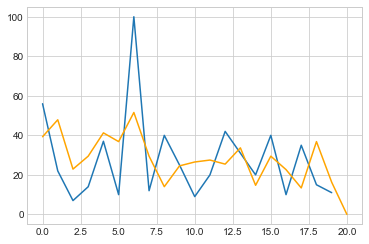

In [62]:
# AVQ normalized
avq2_1 = plt.figure()
ax2_1 = plt.axes()
ax2_1.plot(Kharchenko_AVQ_list)
ax2_1.plot(Kharchenko_avq.pos_avq/Kharchenko_avq.pos_avq.mean()*sum(Kharchenko_AVQ_list)/len(Kharchenko_AVQ_list),color="orange")

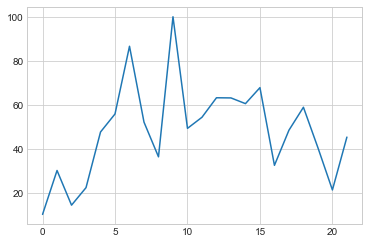

In [32]:
# Odinetz
Odinetz_page_senti.neg_over_all.plot()

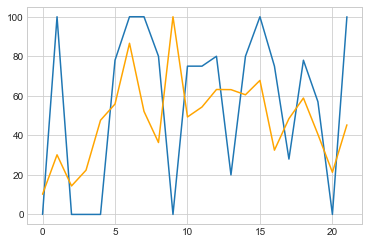

In [33]:
fig3_1 = plt.figure()
ax3_1 = plt.axes()
ax3_1.plot(Odinetz_DRQ_list)
ax3_1.plot(Odinetz_page_senti.neg_over_all,color="orange")

### In general, I would say they look the same in most cases, while several exceptions do exsit. 
For example, in each of the pages, there are several cases where Boder gives 100/0, while the current method gives 0/100. We need to have a close look of those pages. They are:
- Braun: page 17
- Kharchenko: page 8
- Odinetz: page 10

(note that these already +1, as the numbers in the axises are 0 based)

### Summary of results:

### DRQ

$$\frac{negative}{positive+negative}$$

In [ ]:
Braun_DRQ_list = [0,0,87,82,100,100,48,100,0,43,100,100,67,100,0,100,0,33,57,83,80,100,62,25,0,67,100,88,88,100,0,89,100,33,0,50,33]
Kharchenko_DRQ_list = [80,33,66,100,100,100,0,100,0,100,92,70,100,80,0,25,50,100,100,100]
Odinetz_DRQ_list = [0,100,0,0,0,78,100,100,80,0,75,75,80,20,80,100,75,28,78,57,0,100]

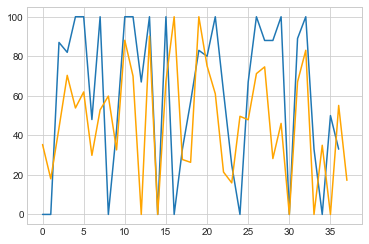

In [28]:
# Braun:
fig1_1 = plt.figure()
ax1_1 = plt.axes()
ax1_1.plot(Braun_DRQ_list)
ax1_1.plot(Braun_page_senti.neg_over_all,color="orange")

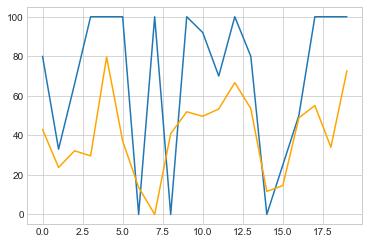

In [31]:
# Kharchenko
fig2_1 = plt.figure()
ax2_1 = plt.axes()
ax2_1.plot(Kharchenko_DRQ_list)
ax2_1.plot(Kharchenko_page_senti.neg_over_all,color="orange")

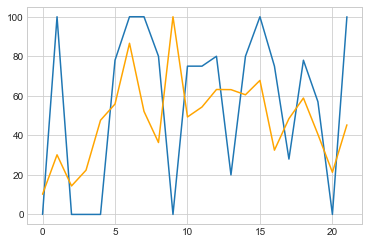

In [33]:
# Odinetz
fig3_1 = plt.figure()
ax3_1 = plt.axes()
ax3_1.plot(Odinetz_DRQ_list)
ax3_1.plot(Odinetz_page_senti.neg_over_all,color="orange")

### AVQ

$$Normalzied \ AVQ = \frac{AVQ_{POS}}{mean(AVQ_{Boder})} \times mean(AVQ_{POS})$$

In [ ]:
Braun_AVQ_list = [50,54,0,0,18,0,20,9,11,11,0,25,8,20,50,71,33,11,8,7,4,4,0,22,27,12,9,31,11,7,7,0,5,0,1,0,0]
Kharchenko_AVQ_list = [56,22,7,14,37,10,100,12,40,25,9,20,42,31,20,40,10,35,15,11]

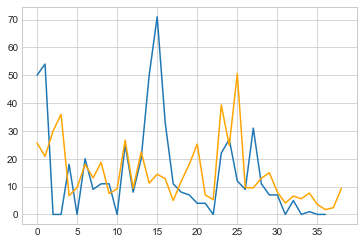

In [56]:
# Braun
avq1_1 = plt.figure()
ax1_1 = plt.axes()
ax1_1.plot(Braun_AVQ_list)
# normalized AVQ
ax1_1.plot(Braun_avq.pos_avq/Braun_avq.pos_avq.mean()*sum(Braun_AVQ_list)/len(Braun_AVQ_list),color="orange")

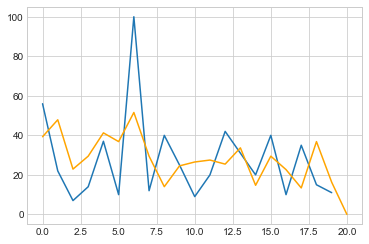

In [62]:
# Kharchenko
avq2_1 = plt.figure()
ax2_1 = plt.axes()
ax2_1.plot(Kharchenko_AVQ_list)
ax2_1.plot(Kharchenko_avq.pos_avq/Kharchenko_avq.pos_avq.mean()*sum(Kharchenko_AVQ_list)/len(Kharchenko_AVQ_list),color="orange")